## Import libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from utils import *
from implementations import *
from feature_filling import *
%load_ext autoreload
%autoreload 2

## Load the data

In [2]:
y, X, ids = load_csv_data(path="resources/train.csv")

print("Input data shape", X.shape)
print("Labels data shape", y.shape)

Input data shape (250000, 30)
Labels data shape (250000,)


In [21]:
np.unique(X[:, 22])

array([0., 1., 2., 3.])

In [19]:
X[np.where((X[:, 22] == 3))[0]].shape

(22164, 30)

In [3]:
# PRI_jet_num column
X[:, 22]

array([2., 1., 1., ..., 1., 0., 0.])

In [4]:
(X[:, 22] == 1) * 1

array([0, 1, 1, ..., 1, 0, 0])

In [5]:
for cat in range(4):
    cat_i = (X[:, 22] == cat) * 1
    cat_i = cat_i.reshape(-1, 1)
    
    X = np.concatenate((X, cat_i), axis=1)

X.shape

(250000, 34)

In [6]:
X = np.delete(X, 22, axis=1)
X.shape

(250000, 33)

In [7]:
X[X == -999] = np.NaN
y[np.where(y == -1)] = 0
y

array([1., 0., 0., ..., 1., 0., 0.])

In [8]:
# X = np.concatenate(((np.isnan(X[:, 0]) * 1).reshape(-1, 1), X), axis=1)

In [9]:
x_tr, x_val, y_tr, y_val = split_data(X, y, 0.8)

print("Training data shapes", x_tr.shape, y_tr.shape)
print("Validation data shapes", x_val.shape, y_val.shape)

Training data shapes (200000, 33) (200000,)
Validation data shapes (50000, 33) (50000,)


## Fill the data

In [10]:
columns_with_missing_features, feature_medians = calculate_feature_medians(x_tr)

print(columns_with_missing_features)
print(feature_medians)

[ 0  4  5  6 12 22 23 24 25 26 27]
[ 1.12394e+02  2.10400e+00  2.25857e+02 -2.47000e-01  4.54000e-01
  6.57470e+01  0.00000e+00 -3.10000e-02  4.79480e+01 -3.00000e-03
 -4.00000e-03]


In [11]:
x_tr = fill_features_with_median(x_tr, columns_with_missing_features, feature_medians)
x_tr

array([[152.079,  79.918, 137.139, ...,   1.   ,   0.   ,   0.   ],
       [174.499,  71.208,  85.312, ...,   1.   ,   0.   ,   0.   ],
       [112.394,  93.859,  70.055, ...,   0.   ,   0.   ,   0.   ],
       ...,
       [ 87.743,  32.397,  58.657, ...,   1.   ,   0.   ,   0.   ],
       [112.394,  68.673, 118.908, ...,   1.   ,   0.   ,   0.   ],
       [180.236, 110.947, 122.994, ...,   0.   ,   0.   ,   0.   ]])

In [12]:
np.isnan(x_tr).sum()

0

In [13]:
x_val = fill_features_with_median(x_val, columns_with_missing_features, feature_medians)
x_val

array([[ 79.033,  39.006,  63.277, ...,   0.   ,   0.   ,   0.   ],
       [ 98.921,  76.163,  65.04 , ...,   0.   ,   0.   ,   0.   ],
       [112.394, 124.646,  93.267, ...,   1.   ,   0.   ,   0.   ],
       ...,
       [137.259,   0.32 ,  80.335, ...,   0.   ,   0.   ,   0.   ],
       [ 96.441,  28.692,  53.366, ...,   1.   ,   0.   ,   0.   ],
       [112.394,  79.264,  63.076, ...,   0.   ,   0.   ,   0.   ]])

In [14]:
np.isnan(x_val).sum()

0

In [15]:
x_tr = np.concatenate((add_bias_term(standardize(x_tr[:, :-4])[0]), x_tr[:, -4:]), axis=1)
x_val = np.concatenate((add_bias_term(standardize(x_val[:, :-4])[0]), x_val[:, -4:]), axis=1)

print("Training data shapes", x_tr.shape)
print("Validation data shapes", x_val.shape)

Training data shapes (200000, 34)
Validation data shapes (50000, 34)


## Train

In [31]:
weights, loss = reg_logistic_regression(
    y_tr, x_tr, 0.01, np.zeros(x_tr.shape[1]), max_iters=10000, gamma=0.2)

Iteration 1/10000: loss=0.6931471805599453, w=[-0.03923125 -0.03108567 -0.01826527 -0.01657993  0.0103589   0.01884357
 -0.03456007  0.01925418  0.01852169  0.01084898 -0.026275    0.01870039
  0.02002675  0.01939515  0.0096176   0.01954404  0.0195332  -0.00168734
  0.01955141  0.01953791  0.00224037  0.01956813 -0.04948181 -0.0069401
  0.01954374  0.01955358 -0.0020947   0.01954929  0.01954176  0.00488317
 -0.02432625 -0.01117562  0.00059937 -0.00432875]
Iteration 201/10000: loss=0.5578397681227706, w=[-0.2212676   0.14410751 -1.41963067 -0.10341939  0.37291807  0.11324345
  0.17333326  0.09837627  0.12790315 -0.03739987  0.14426807  0.07663589
  0.15447676  0.11445073  0.75585868  0.10836097  0.10608984 -0.11262206
  0.1082674   0.11315512 -0.1322191   0.1113719  -0.06171669 -0.0944522
  0.10938146  0.11032071 -0.13096375  0.11149351  0.10920536 -0.27850621
 -0.19537654 -0.03852591  0.24347856 -0.23084371]
Iteration 401/10000: loss=0.5577484614011328, w=[-0.22167567  0.15505381 -1.45

In [32]:
print("Training score", compute_score(y_tr, x_tr, weights))
print("Validation score", compute_score(y_val, x_val, weights))

Training score 0.715655
Validation score 0.71822


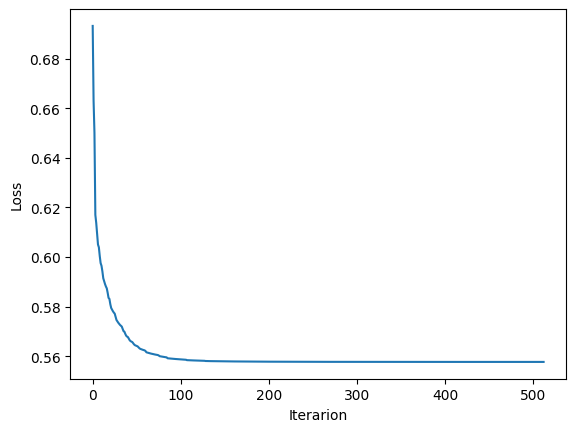

In [33]:
plt.plot(np.arange(len(loss)), loss)
plt.xlabel("Iterarion")
plt.ylabel("Loss")
plt.show()

## Testing

In [19]:
_, X_test, ids_test = load_csv_data(path="resources/test.csv")

print("Input data shape", X_test.shape)

Input data shape (568238, 30)


In [20]:
for cat in range(4):
    cat_i = (X_test[:, 22] == cat) * 1
    cat_i = cat_i.reshape(-1, 1)
    
    X_test = np.concatenate((X_test, cat_i), axis=1)

X_test.shape

(568238, 34)

In [21]:
X_test = np.delete(X_test, 22, axis=1)
X_test.shape

(568238, 33)

In [22]:
X_test[X_test == -999] = np.NaN
# X_test = np.concatenate(((np.isnan(X_test[:, 0]) * 1).reshape(-1, 1), X), axis=1)

In [23]:
X_test = fill_features_with_median(X_test, columns_with_missing_features, feature_medians)
np.isnan(X_test).sum()

0

In [25]:
X_test = np.concatenate((add_bias_term(standardize(X_test[:, :-4])[0]), X_test[:, -4:]), axis=1)
X_test.shape

(568238, 34)

In [26]:
y_test = np.array([predictions(x, weights) for x in X_test])

In [27]:
y_test[np.where(y_test == 0)] = -1
print(y_test)

[-1 -1 -1 ...  1 -1 -1]


In [28]:
(y_test==1).sum() / len(y_test)

0.24427792579869703

In [29]:
create_csv_submission(ids_test, y_test, "05.csv")